Week1 授業課題１　曽呂利新左衛門問題

「Pythonを使ってみよう」の問題で扱った紙を折ると月に届く話に似たものとして、曽呂利新左衛門の逸話があります。これを題材にプログラミングを進めます。

秀吉から褒美を下される際、何を希望するか尋ねられた新左衛門は、今日は米1粒、翌日には倍の2粒、その翌日には更に倍の4粒と、日ごとに倍の量の米を100日間もらう事を希望した。米粒なら大した事はないと思った秀吉は簡単に承諾したが、日ごとに倍ずつ増やして行くと100日後には膨大な量になる事に途中で気づき、他の褒美に変えてもらった。

問題１　100日目の米粒の数

100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。
また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。
（縦軸が米の数、横軸が日数）

In [61]:
#1日目の米粒
kome = 1
kome_sum = kome

#その日の米粒、累計の米粒をリストを用意して、計算結果を追加していく
kome_day = [kome]
kome_total = [kome_sum]

for i in range(99):
    kome = kome*2
    kome_sum += kome
    
    kome_day.append(kome)
    kome_total.append(kome_sum)
    
print("チェック:その日の米粒",kome_day[0:10])
print("チェック:その日の累計",kome_total[0:10])

チェック:その日の米粒 [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
チェック:その日の累計 [1, 3, 7, 15, 31, 63, 127, 255, 511, 1023]


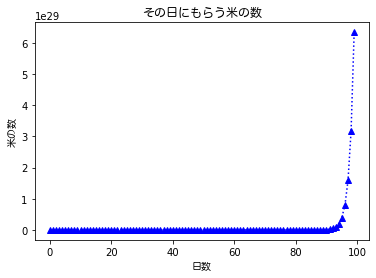

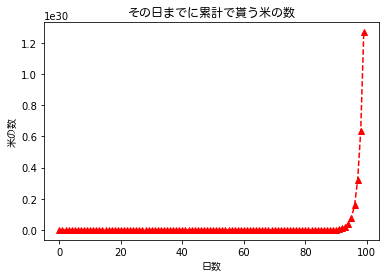

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("その日にもらう米の数", fontname = "Hiragino Maru Gothic Pro")
plt.xlabel("日数", fontname = "Hiragino Maru Gothic Pro")
plt.ylabel("米の数", fontname = "Hiragino Maru Gothic Pro")
plt.plot(kome_day,"b^:")
plt.show()

plt.title("その日までに累計で貰う米の数", 
          fontname = "Hiragino Maru Gothic Pro")
plt.xlabel("日数", fontname = "Hiragino Maru Gothic Pro")
plt.ylabel("米の数", fontname = "Hiragino Maru Gothic Pro")
plt.plot(kome_total,"r^--")
plt.show()

問題２　100日目以外の米粒の数

この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。

以下の雛形には関数としての枠組みだけではなく、引数や返り値についてのコメントも記載してあります。参考にして、自分なりにも分かりやすくコメントを書き換えてください。

In [63]:
def kome_cal(day):
    
    #1日目の米粒
    kome = 1
    kome_sum = kome

    kome_day = [kome]
    kome_total = [kome_sum]
    
    for i in range(day-1):
        kome = kome*2
        kome_sum += kome
    
        kome_day.append(kome)
        kome_total.append(kome_sum)
        
    list_kome_day = kome_day
    list_kome_total = kome_total
    
    return list_kome_day, list_kome_total

#120日目の米粒（ここでは受講期間120日とした）
day = 120

list_kome_day, list_kome_total = kome_cal(day)

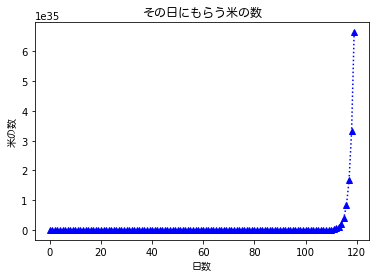

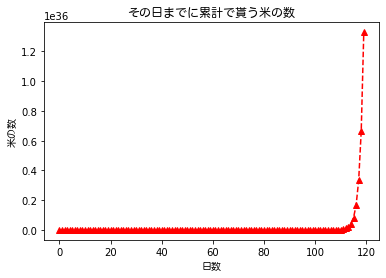

In [70]:
plt.title("その日にもらう米の数", fontname = "Hiragino Maru Gothic Pro")
plt.xlabel("日数", fontname = "Hiragino Maru Gothic Pro")
plt.ylabel("米の数", fontname = "Hiragino Maru Gothic Pro")
plt.plot(list_kome_day,"b^:")
plt.show()

plt.title("その日までに累計で貰う米の数", 
          fontname = "Hiragino Maru Gothic Pro")
plt.xlabel("日数", fontname = "Hiragino Maru Gothic Pro")
plt.ylabel("米の数", fontname = "Hiragino Maru Gothic Pro")
plt.plot(list_kome_total,"r^--")
plt.show()

【問題3】貰える米で何人が何日生活できるか

この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。

ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

＜問題設定＞
米（精白米）100ｇで360kcal　https://calorie.slism.jp/101083/
米1000粒20ｇとして、
米１粒は、360kcal÷5÷1000＝0.072kcal＝72cal

受講生：9人
1日に必要なカロリー：2200kcal
として、1日に必要なカロリーを摂取できれば、その日は生活できるものとする。

In [65]:
def day_cal(day,person):
    
    #1日目の米粒
    kome = 1
    kome_sum = kome

    kome_day = [kome]
    kome_total = [kome_sum]
    
    for i in range(day-1):
        kome = kome*2
        kome_sum += kome
    
        kome_day.append(kome)
        kome_total.append(kome_sum)
        
    list_kome_day = kome_day
    list_kome_total = kome_total
    
    #120日目の累計でもらえた米粒のキロカロリー
    total_kcal = list_kome_total[-1] * 72/1000

    #1日に必要なキロカロリー
    necessary_kcal = person*2200

    #生活できる日数
    live_day = total_kcal/necessary_kcal
    
    return live_day

day = 120
person = 9

print("{}日分の米粒で、{}人の受講生は、{:.1f}日間生活できる"
      .format(day, person, day_cal(day,person)))

120日分の米粒で、9人の受講生は、4833556348308784722472660369408.0日間生活できる
